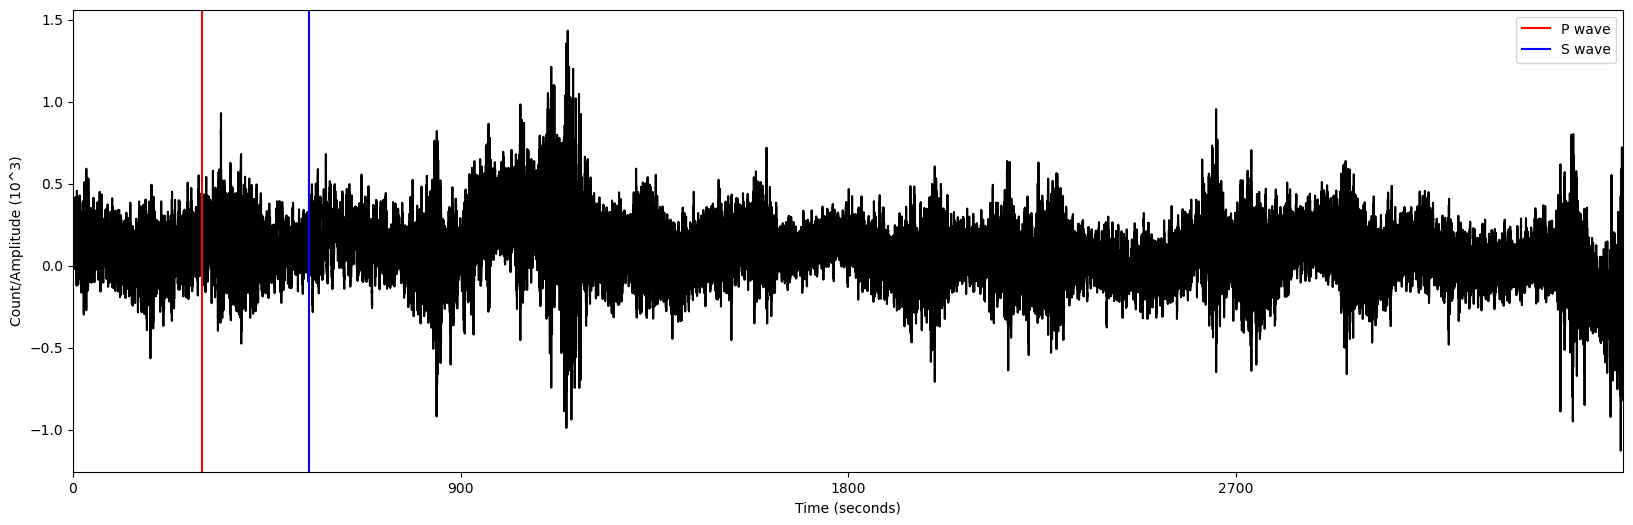

In [5]:
import matplotlib.pyplot as plt
from obspy import read
from obspy.taup import TauPyModel

#Load the file
st = read("../Data_Sources/II.KAPI.00.BH1.M.2024.268.105837.SAC")

#Get the data and the necessary objects needed
trace = st[0]
data = trace.data/1000
times = trace.times()

#Plot using matplotlib
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(times, data, color='black')

#Arrival times (we'll only be using the P and S waves)
arrival_time_P = 300.35575197494614
arrival_time_S = 547.2421541356196

#Add the starting point of P and S waves in
ax.axvline(x=arrival_time_P, color='r', label='P wave')
ax.axvline(x=arrival_time_S, color='b', label='S wave')
ax.set_xlim([0, times[-1]])
ax.set_xticks(range(0, int(times[-1]), 900))


#Lavbels
plt.xlabel("Time (seconds)")
plt.ylabel("Count/Amplitude (10^3)")
plt.legend()
#plt.savefig('Marked_Plotted_Waveform.png')

plt.show()

Original Sampling Rate: 40.0 Hz
Nyquist Frequency: 20.0 Hz


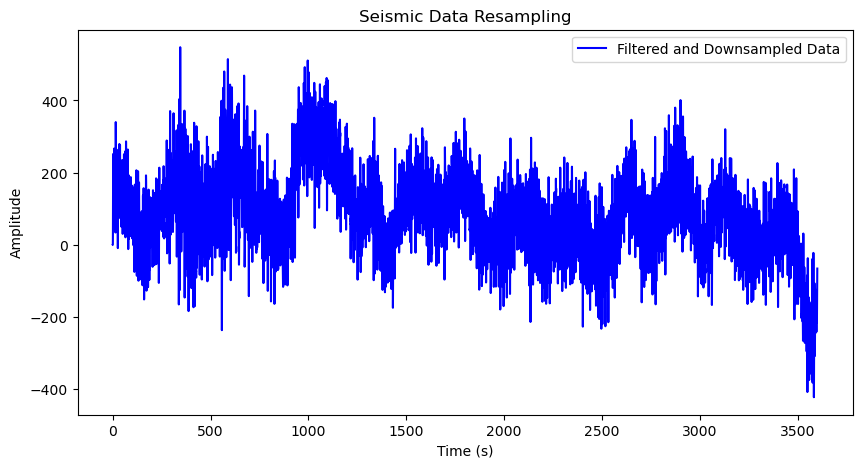

In [80]:
import obspy
from obspy import read

# Load the SAC file
st = read("II.KAPI.00.BH1.M.2024.268.105837.SAC")  # Replace with your actual file path
tr = st[0]  # Get the first trace (assuming one trace in the file)

# Access the data (NumPy array)
data = tr.data

# Get the original sampling rate
sampling_rate = tr.stats.sampling_rate
print(f"Original Sampling Rate: {sampling_rate} Hz")

# Calculate the Nyquist frequency
nyquist_freq = sampling_rate / 2.0
print(f"Nyquist Frequency: {nyquist_freq} Hz")

# Apply a low-pass filter (cutoff frequency should be below Nyquist frequency)
cutoff_freq = 10.0  # Specify your desired cutoff frequency
if cutoff_freq < nyquist_freq:
    tr.filter("lowpass", freq=cutoff_freq / nyquist_freq)  # Normalize the cutoff frequency
else:
    print("Cutoff frequency must be less than the Nyquist frequency.")

# Downsample the data (e.g., reduce the sampling rate by a factor of 2)
tr.decimate(factor=2)

# Plotting the data
import matplotlib.pyplot as plt

# Plot the filtered and downsampled data
plt.figure(figsize=(10, 5))
plt.plot(tr.times(), tr.data, label="Filtered and Downsampled Data", color="blue")
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Seismic Data Resampling")
plt.show()


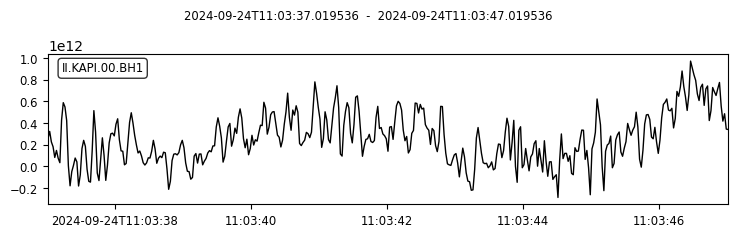

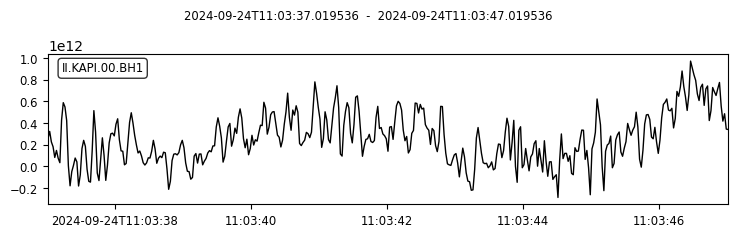

In [110]:
st = read(file_path)
st_trimmed = st[0].trim(starttime=300, endtime=st[0].stats.starttime + 310) #Show the first 10 seconds
st_trimmed.plot()

Sampling Rate: 200.0 Hz
Nyquist Frequency (Expected Highest Frequency): 100.0 Hz


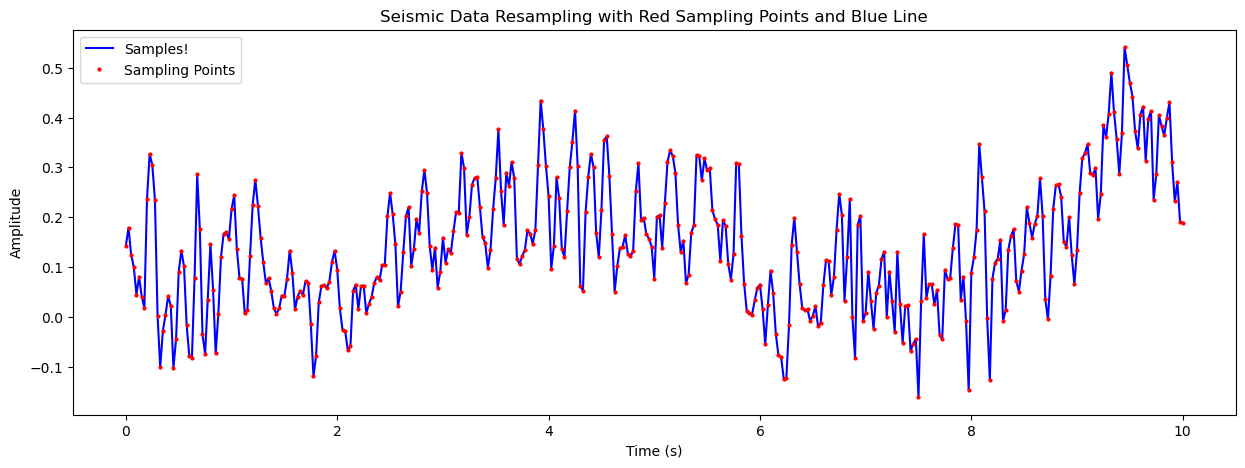

In [4]:
from obspy import read
import matplotlib.pyplot as plt

#The files! The files! Theeeee files!!!!!
file_path = "../Data_Sources/II.KAPI.00.BH1.M.2024.268.105837.SAC"
st = read(file_path)
trace = st[0]
trace = trace.trim(starttime=300, endtime=trace.stats.starttime + 310)

#Setting the Nyquist Rate based on expected Highest Frequency
data = trace.data/1000
times = trace.times()
sampling_rate = trace.stats.sampling_rate * 5
print(f"Sampling Rate: {sampling_rate} Hz")
nyquist_freq = sampling_rate / 2.0
print(f"Nyquist Frequency (Expected Highest Frequency): {nyquist_freq} Hz")

#Plotting the result as scatter plot
plt.figure(figsize=(15, 5))
plt.plot(times, data, label="Samples!", color="blue", linestyle='-')
plt.plot(times, data, 'ro', label="Sampling Points", markersize=2)

#Showing the result
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Seismic Data Resampling with Red Sampling Points and Blue Line")
plt.show()

Sampling Rate: 2.0 Hz
Nyquist Frequency (Expected Highest Frequency): 1.0 Hz


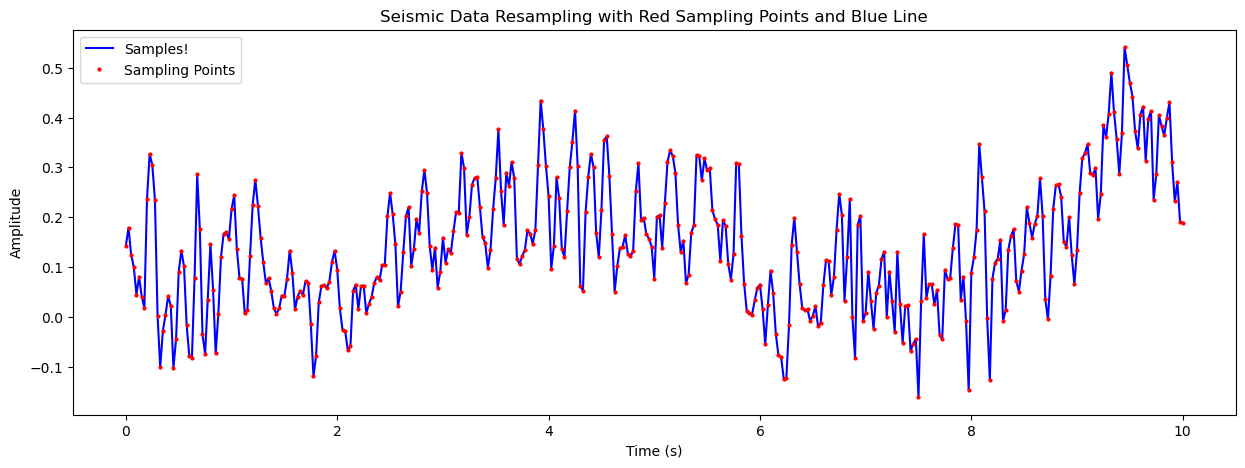

In [124]:
#PLAYGROUND PLAYGROUND! USE ME HOWEVER YOU WANT...
from obspy import read
import matplotlib.pyplot as plt

#The files! The files! Theeeee files!!!!!
file_path = "II.KAPI.00.BH1.M.2024.268.105837.SAC"
st = read(file_path)
trace = st[0]
trace = trace.trim(starttime=300, endtime=trace.stats.starttime + 310)

#Setting the Nyquist Rate based on expected Highest Frequency
data = trace.data/1000
times = trace.times()
sampling_rate = trace.stats.sampling_rate * 5
print(f"Sampling Rate: {sampling_rate} Hz")
nyquist_freq = sampling_rate / 2.0
print(f"Nyquist Frequency (Expected Highest Frequency): {nyquist_freq} Hz")

#Plotting the result as scatter plot
plt.figure(figsize=(15, 5))
plt.plot(times, data, label="Samples!", color="blue", linestyle='-')
plt.plot(times, data, 'ro', label="Sampling Points", markersize=2)

#Showing the result
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Seismic Data Resampling with Red Sampling Points and Blue Line")
plt.show()

In [115]:
# from obspy import read
# import matplotlib.pyplot as plt

# file_path = "II.KAPI.00.BH1.M.2024.268.105837.SAC"
# st = read(file_path)
# tr = st[0]
# tr = tr.trim(starttime=300, endtime=tr.stats.starttime + 310)
# data = tr.data

# sampling_rate = tr.stats.sampling_rate 
# print(f"Original Sampling Rate: {sampling_rate} Hz")
# nyquist_freq = sampling_rate / 2.0
# print(f"Nyquist Frequency: {nyquist_freq} Hz")

# plt.figure(figsize=(15, 5))

# plt.plot(tr.times(), tr.data, label="Downsampled Data", color="blue", linestyle='-')
# plt.plot(tr.times(), tr.data, 'ro', label="Sampling Points", markersize=2)  # 'ro' is red circles

# plt.legend()
# plt.xlabel("Time (s)")
# plt.ylabel("Amplitude")
# plt.title("Seismic Data Resampling with Red Sampling Points and Blue Line")
# plt.show()

In [122]:
from obspy import read
import matplotlib.pyplot as plt
from scipy.signal import resample

file_path = "II.KAPI.00.BH1.M.2024.268.105837.SAC"
st = read(file_path)
tr = st[0]
tr = tr.trim(starttime=tr.stats.starttime, endtime=tr.stats.starttime + 10)

sampling_rate = tr.stats.sampling_rate
print(f"Original Sampling Rate: {sampling_rate} Hz")

factor = 1
new_num_samples = len(tr.data) * factor
resampled_data = resample(tr.data, new_num_samples)

tr.data = resampled_data
tr.stats.sampling_rate = sampling_rate * factor

plt.figure(figsize=(15, 5))
plt.plot(tr.times(), tr.data, label="Resampled Data", color="blue", linestyle='-')
plt.plot(tr.times(), tr.data, 'ro', label="Sampling Points", markersize=2)  # 'ro' is red circles

plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Seismic Data Resampled with Red Sampling Points and Blue Line")
plt.show()


Original Sampling Rate: 40.0 Hz


TypeError: 'float' object cannot be interpreted as an integer

New Sampling Rate: 10.0 Hz


ValueError: x and y must have same first dimension, but have shapes (401,) and (100,)

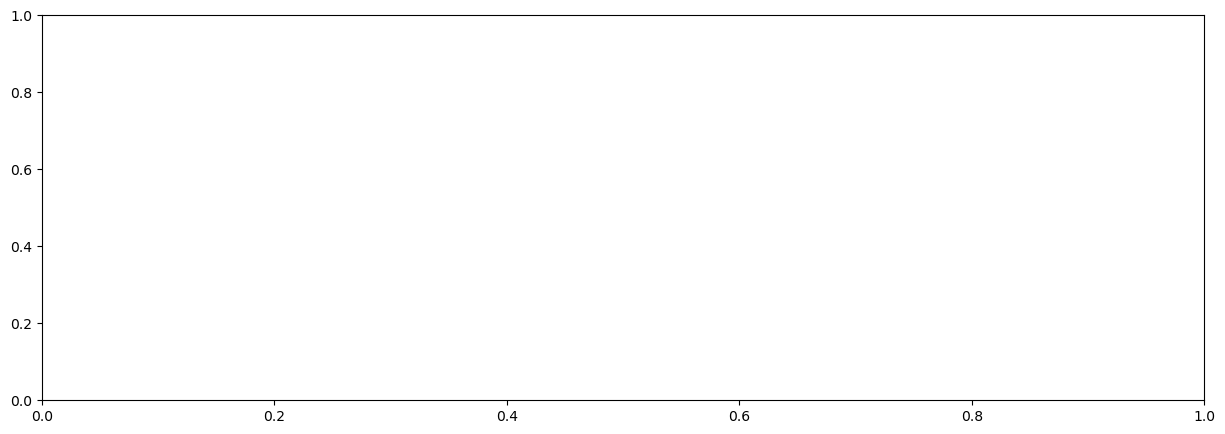

In [181]:
#PLAYGROUND!

from obspy import read
import matplotlib.pyplot as plt
from scipy.signal import resample


file_path = "II.KAPI.00.BH1.M.2024.268.105837.SAC"
st = read(file_path)
trace = st[0]
trace = trace.trim(starttime=trace.stats.starttime, endtime=trace.stats.starttime + 10)

data = trace.data
times = trace.times()

original_sampling_rate = trace.stats.sampling_rate #The default sampling rate (40 Hz)
#print(f"Original Sampling Rate: {original_sampling_rate} Hz")


desired_rate = 10 #How many points of data we wish to have in a single second.
sample_factor = original_sampling_rate / desired_rate #Since default is 40 Hz, we do this to either downsample or upsample.


new_num_samples = int(len(data) / sample_factor) #int to ensure no floats, divide again.
sampled_data = resample(data, new_num_samples) #The actual resampling, 
#placing the amount of points in a second equal to the amount we set beforehand in desired_rate

data = sampled_data #Replacing original value with updated value

tr.stats.sampling_rate = 10
#times = trace.times()
print(f"New Sampling Rate: {tr.stats.sampling_rate} Hz")

# Plot the downsampled data
plt.figure(figsize=(15, 5))
plt.plot(trace.times(), data, label=f"Downsampled to {desired_rate} Hz", color="blue", linestyle='-')
plt.plot(trace.times(), data, 'ro', label="Sampling Points", markersize=2)  # 'ro' is red circles

plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title(f"Seismic Data Downsampled to {desired_rate} Hz")
#plt.savefig('SeisBS')
plt.show()


New Sampling Rate: 10.0 Hz


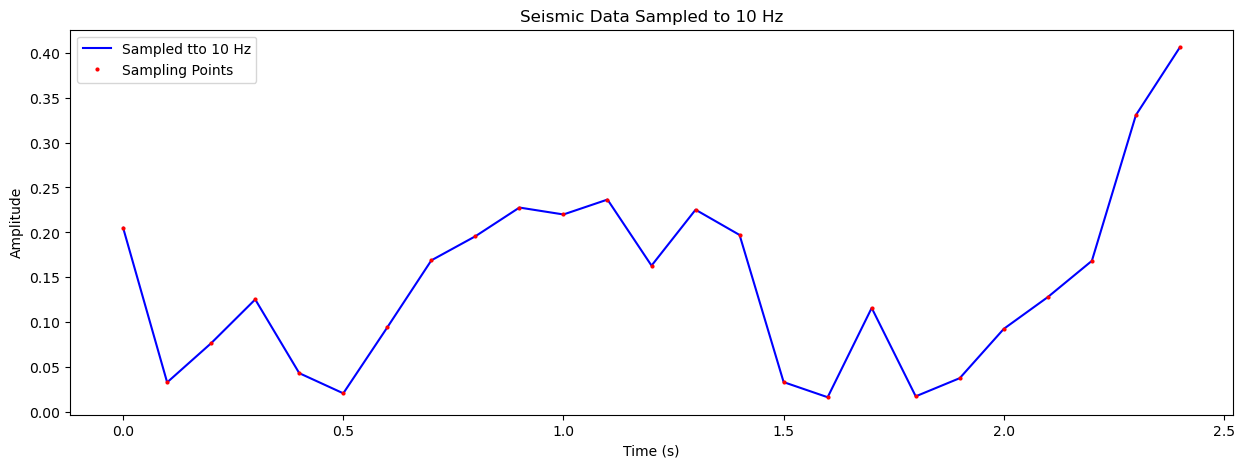

In [224]:
#PLAYGROUND!

from obspy import read
import matplotlib.pyplot as plt
from scipy.signal import resample

file_path = "II.KAPI.00.BH1.M.2024.268.105837.SAC"

st = read(file_path)
trace = st[0]
trace = trace.trim(starttime=300, endtime=trace.stats.starttime + 310) #Trimming t

original_sampling_rate = trace.stats.sampling_rate #The default sampling rate (40 Hz)

rate_of_desire = 10 #How many points of data we wish to have in a single second.
sample_factor = original_sampling_rate / rate_of_desire #Since default is 40 Hz, we do this to either downsample or upsample.

new_num_samples = int(len(tr.data) / sample_factor) #int to ensure no floats, divide again.
sampled_data = resample(trace.data, new_num_samples) #The actual resampling, 
#placing the amount of points in a second equal to the amount we set beforehand in rate_of_desire

trace.data = sampled_data #Replacing original value with updated value
trace.stats.sampling_rate = rate_of_desire #Update the x-axis based to the rate_of_desire
print(f"New Sampling Rate: {trace.stats.sampling_rate} Hz")

#Plotting the data
plt.figure(figsize=(15, 5))
plt.plot(trace.times(), trace.data/1000, label=f"Sampled tto {rate_of_desire} Hz", color="blue", linestyle='-') #Waveform
plt.plot(trace.times(), trace.data/1000, 'ro', label="Sampling Points", markersize=2) #Scatterplot

plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title(f"Seismic Data Sampled to {rate_of_desire} Hz")
#plt.savefig('Seis')

plt.show()


New Sampling Rate: 30.0 Hz


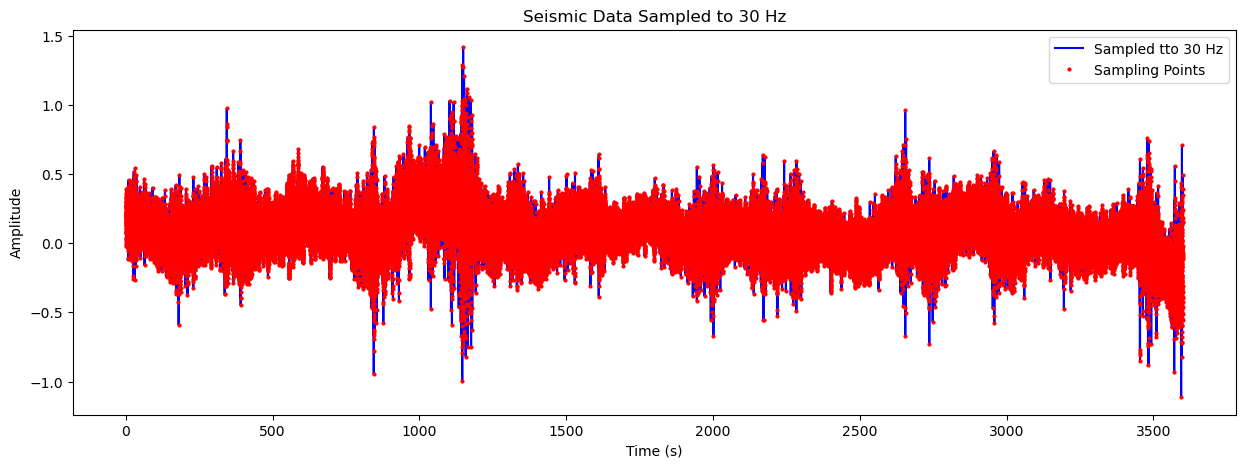

In [235]:
#PLAYGROUND!

from obspy import read
import matplotlib.pyplot as plt
from scipy.signal import resample

file_path = "II.KAPI.00.BH1.M.2024.268.105837.SAC"

st = read(file_path)
trace = st[0]
#trace = trace.trim(starttime=300, endtime=trace.stats.starttime + 310) #Trimming t
trace = trace.trim(starttime=trace.stats.starttime, endtime=trace.stats.endtime) #Trimming t

original_sampling_rate = trace.stats.sampling_rate #The default sampling rate (40 Hz)

rate_of_desire = 30 #How many points of data we wish to have in a single second.
sample_factor = original_sampling_rate / rate_of_desire #Since default is 40 Hz, we do this to either downsample or upsample.

new_num_samples = int(len(trace.data) / sample_factor) #int to ensure no floats, divide again.
sampled_data = resample(trace.data, new_num_samples) #The actual resampling, 
#placing the amount of points in a second equal to the amount we set beforehand in rate_of_desire

trace.data = sampled_data #Replacing original value with updated value
trace.stats.sampling_rate = rate_of_desire #Update the x-axis based to the rate_of_desire

print(f"New Sampling Rate: {trace.stats.sampling_rate} Hz")

#Plotting the data
plt.figure(figsize=(15, 5))
plt.plot(trace.times(), trace.data/1000, label=f"Sampled tto {rate_of_desire} Hz", color="blue", linestyle='-') #Waveform
plt.plot(trace.times(), trace.data/1000, 'ro', label="Sampling Points", markersize=2) #Scatterplot

plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title(f"Seismic Data Sampled to {rate_of_desire} Hz")
#plt.savefig('Seis')

plt.show()


New Sampling Rate: 30.0 Hz


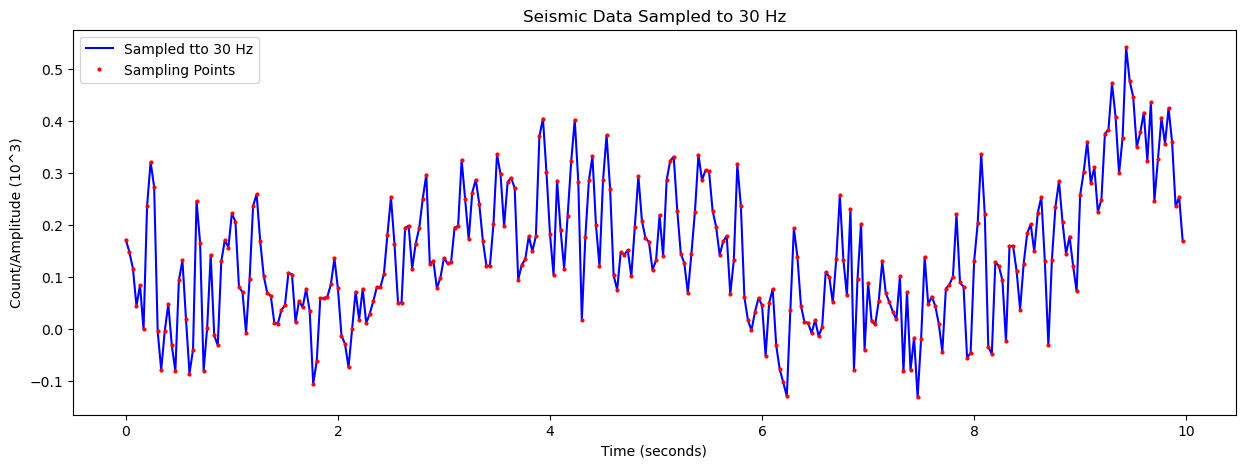

In [237]:
#PLAYGROUND!

from obspy import read
import matplotlib.pyplot as plt
from scipy.signal import resample

file_path = "II.KAPI.00.BH1.M.2024.268.105837.SAC"

st = read(file_path)
trace = st[0]
trace = trace.trim(starttime=300, endtime=trace.stats.starttime + 310) #Trimming t
#trace = trace.trim(starttime=trace.stats.starttime, endtime=trace.stats.endtime) #Trimming t

original_sampling_rate = trace.stats.sampling_rate #The default sampling rate (40 Hz)

rate_of_desire = 30 #How many points of data we wish to have in a single second.
sample_factor = original_sampling_rate / rate_of_desire #Since default is 40 Hz, we do this to either downsample or upsample.

new_num_samples = int(len(trace.data) / sample_factor) #int to ensure no floats, divide again.
sampled_data = resample(trace.data, new_num_samples) #The actual resampling, 
#placing the amount of points in a second equal to the amount we set beforehand in rate_of_desire

trace.data = sampled_data #Replacing original value with updated value
trace.stats.sampling_rate = rate_of_desire #Update the x-axis based to the rate_of_desire

print(f"New Sampling Rate: {trace.stats.sampling_rate} Hz")

#Plotting the data
plt.figure(figsize=(15, 5))
plt.plot(trace.times(), trace.data/1000, label=f"Sampled tto {rate_of_desire} Hz", color="blue", linestyle='-') #Waveform
plt.plot(trace.times(), trace.data/1000, 'ro', label="Sampling Points", markersize=2) #Scatterplot

plt.legend()
plt.xlabel("Time (seconds)")
plt.ylabel("Count/Amplitude (10^3)")
plt.title(f"Seismic Data Sampled to {rate_of_desire} Hz")

plt.show()


New Sampling Rate: 200.0 Hz


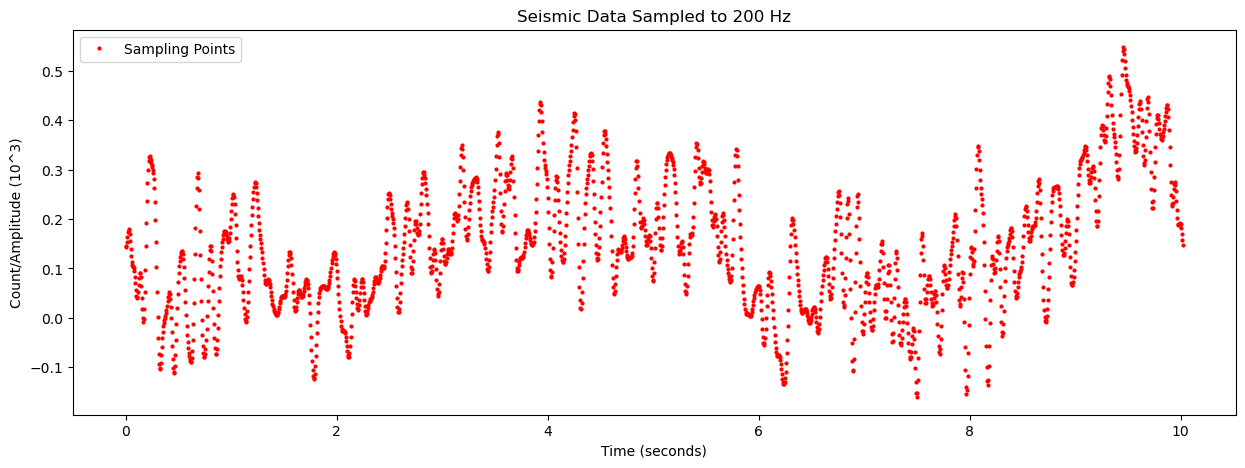

In [242]:
#PLAYGROUND!

from obspy import read
import matplotlib.pyplot as plt
from scipy.signal import resample

#The files, the files! The.. FILES!!!!
file_path = "II.KAPI.00.BH1.M.2024.268.105837.SAC"
st = read(file_path)
trace = st[0]
trace = trace.trim(starttime=300, endtime=trace.stats.starttime + 310) #Trimming t
#trace = trace.trim(starttime=trace.stats.starttime, endtime=trace.stats.endtime) #Will be enabled in the explanation soon.. Maybe?

original_sampling_rate = trace.stats.sampling_rate #The default sampling rate (40 Hz)

rate_of_desire = 200 #How many points of data we wish to have in a single second.
sample_factor = original_sampling_rate / rate_of_desire #Since default is 40 Hz, we do this to either downsample or upsample.

new_num_samples = int(len(trace.data) / sample_factor) #int to ensure no floats, divide again.
sampled_data = resample(trace.data, new_num_samples) #The actual resampling, 
#placing the amount of points in a second equal to the amount we set beforehand in rate_of_desire

trace.data = sampled_data #Replacing original value with updated value
trace.stats.sampling_rate = rate_of_desire #Update the x-axis based to the rate_of_desire

print(f"New Sampling Rate: {trace.stats.sampling_rate} Hz")

#Plotting the data
plt.figure(figsize=(15, 5))
#plt.plot(trace.times(), trace.data/1000, label=f"Sampled tto {rate_of_desire} Hz", color="blue", linestyle='-') #Waveform
plt.plot(trace.times(), trace.data/1000, 'ro', label="Sampling Points", markersize=2) #Scatterplot

plt.legend()
plt.xlabel("Time (seconds)")
plt.ylabel("Count/Amplitude (10^3)")
plt.title(f"Seismic Data Sampled to {rate_of_desire} Hz")

plt.show()


New Sampling Rate: 200.0 Hz


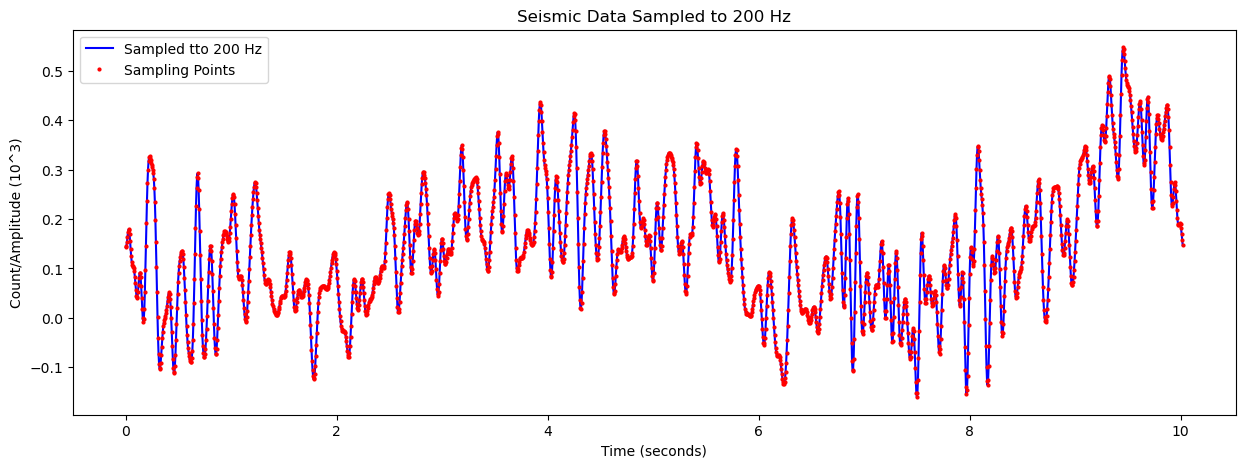

In [241]:
#PLAYGROUND!

from obspy import read
import matplotlib.pyplot as plt
from scipy.signal import resample

#The files, the files! The.. FILES!!!!
file_path = "II.KAPI.00.BH1.M.2024.268.105837.SAC"
st = read(file_path)
trace = st[0]
trace = trace.trim(starttime=300, endtime=trace.stats.starttime + 310) #Trimming t
#trace = trace.trim(starttime=trace.stats.starttime, endtime=trace.stats.endtime) #Will be enabled in the explanation soon.. Maybe?

original_sampling_rate = trace.stats.sampling_rate #The default sampling rate (40 Hz)

rate_of_desire = 200 #How many points of data we wish to have in a single second.
sample_factor = original_sampling_rate / rate_of_desire #Since default is 40 Hz, we do this to either downsample or upsample.

new_num_samples = int(len(trace.data) / sample_factor) #int to ensure no floats, divide again.
sampled_data = resample(trace.data, new_num_samples) #The actual resampling, 
#placing the amount of points in a second equal to the amount we set beforehand in rate_of_desire

trace.data = sampled_data #Replacing original value with updated value
trace.stats.sampling_rate = rate_of_desire #Update the x-axis based to the rate_of_desire

#Plotting the data
plt.figure(figsize=(15, 5))
plt.plot(trace.times(), trace.data/1000, label=f"Sampled tto {rate_of_desire} Hz", color="blue", linestyle='-') #Waveform
plt.plot(trace.times(), trace.data/1000, 'ro', label="Sampling Points", markersize=2) #Scatterplot

plt.legend()
plt.xlabel("Time (seconds)")
plt.ylabel("Count/Amplitude (10^3)")
plt.title(f"Seismic Data Sampled to {rate_of_desire} Hz")

plt.show()


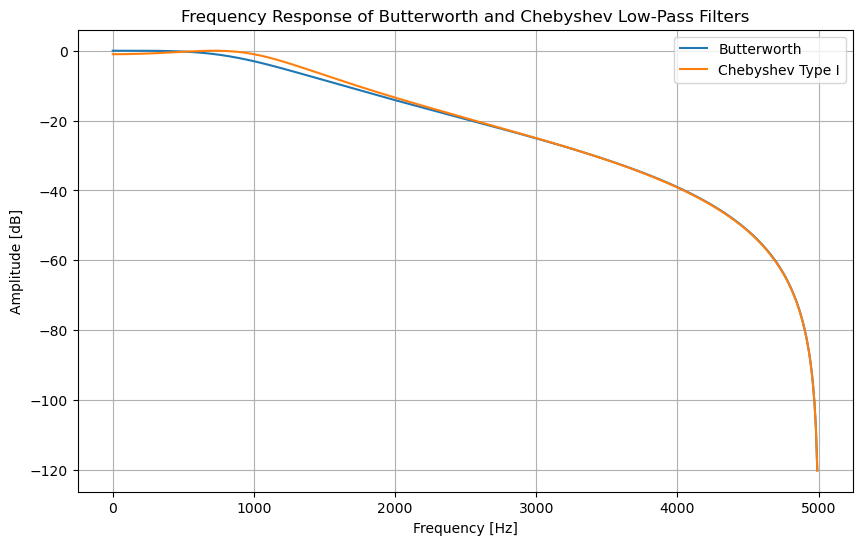

In [246]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Filter specifications
order = 2           # 2nd order Sallen-Key filter
cutoff_freq = 1000  # Cutoff frequency in Hz
sampling_rate = 10000  # Sampling rate in Hz

b_butter, a_butter = signal.butter(order, cutoff_freq, fs=sampling_rate, btype='low', analog=False)

b_cheby, a_cheby = signal.cheby1(order, 1, cutoff_freq, fs=sampling_rate, btype='low', analog=False)

# Frequency response for both filters
w_butter, h_butter = signal.freqz(b_butter, a_butter, fs=sampling_rate)
w_cheby, h_cheby = signal.freqz(b_cheby, a_cheby, fs=sampling_rate)

# Plot the frequency responses
plt.figure(figsize=(10, 6))
plt.plot(w_butter, 20 * np.log10(np.abs(h_butter)), label='Butterworth')
plt.plot(w_cheby, 20 * np.log10(np.abs(h_cheby)), label='Chebyshev Type I')
plt.title('Frequency Response of Butterworth and Chebyshev Low-Pass Filters')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.grid(True)
plt.legend()
plt.show()


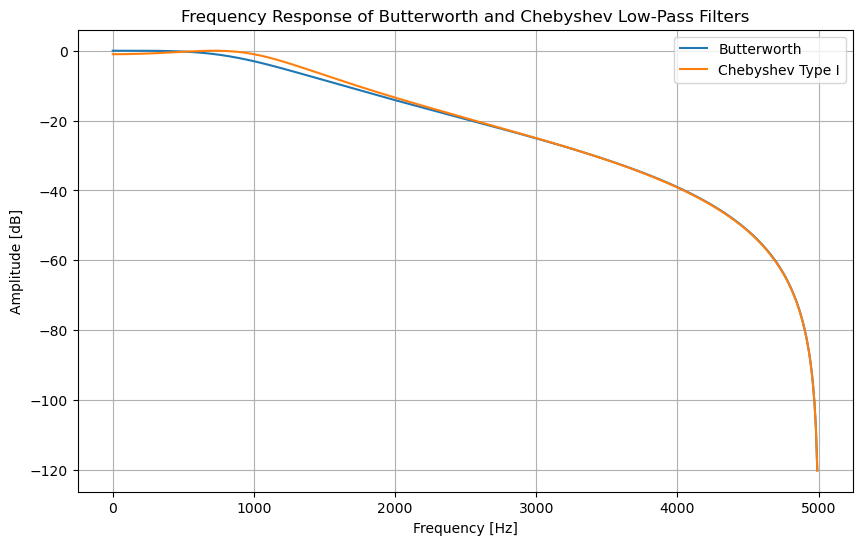

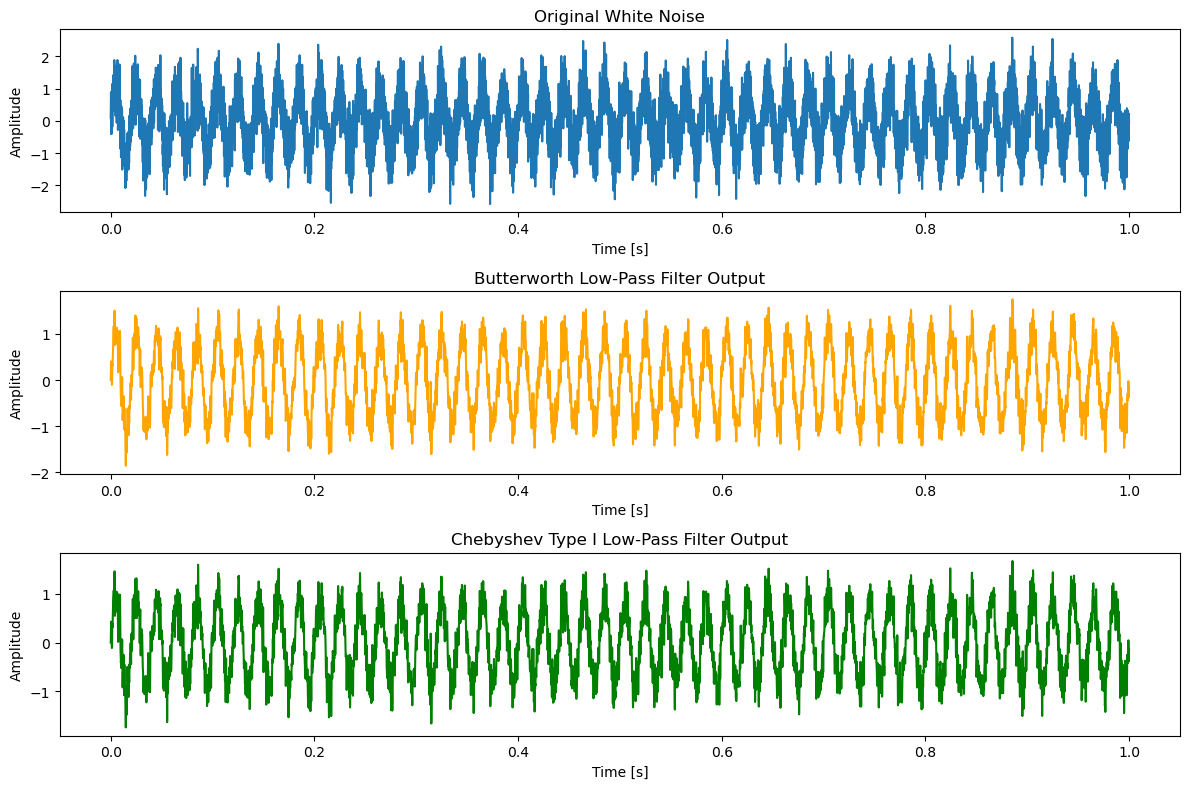

In [254]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Filter specifications
order = 2           # 2nd order Sallen-Key filter
cutoff_freq = 1000  # Cutoff frequency in Hz
sampling_rate = 10000  # Sampling rate in Hz

# Butterworth low-pass filter design
b_butter, a_butter = signal.butter(order, cutoff_freq, fs=sampling_rate, btype='low', analog=False)

# Chebyshev Type I low-pass filter design (ripple = 1 dB in passband)
b_cheby, a_cheby = signal.cheby1(order, 1, cutoff_freq, fs=sampling_rate, btype='low', analog=False)

# Frequency response for both filters
w_butter, h_butter = signal.freqz(b_butter, a_butter, fs=sampling_rate)
w_cheby, h_cheby = signal.freqz(b_cheby, a_cheby, fs=sampling_rate)

# Plot the frequency responses
plt.figure(figsize=(10, 6))
plt.plot(w_butter, 20 * np.log10(np.abs(h_butter)), label='Butterworth')
plt.plot(w_cheby, 20 * np.log10(np.abs(h_cheby)), label='Chebyshev Type I')
plt.title('Frequency Response of Butterworth and Chebyshev Low-Pass Filters')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.grid(True)
plt.legend()
plt.show()

freq = 50  # Frequency of the sine wave in Hz
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
clean_sine_wave = np.sin(2 * np.pi * freq * t)
noise = 0.5 * np.random.normal(0, 1, t.shape)  # Adding some noise
messy_sine_wave = clean_sine_wave + noise

# Apply the Butterworth and Chebyshev filters to the messy sine wave
filtered_butter = signal.lfilter(b_butter, a_butter, messy_sine_wave)
filtered_cheby = signal.lfilter(b_cheby, a_cheby, messy_sine_wave)

# Plot the original and filtered signals
plt.figure(figsize=(12, 8))

# Plot the original white noise
plt.subplot(3, 1, 1)
plt.plot(t, messy_sine_wave)
plt.title('Original White Noise')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# Plot the Butterworth filtered signal
plt.subplot(3, 1, 2)
plt.plot(t, filtered_butter, color='orange')
plt.title('Butterworth Low-Pass Filter Output')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# Plot the Chebyshev filtered signal
plt.subplot(3, 1, 3)
plt.plot(t, filtered_cheby, color='green')
plt.title('Chebyshev Type I Low-Pass Filter Output')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


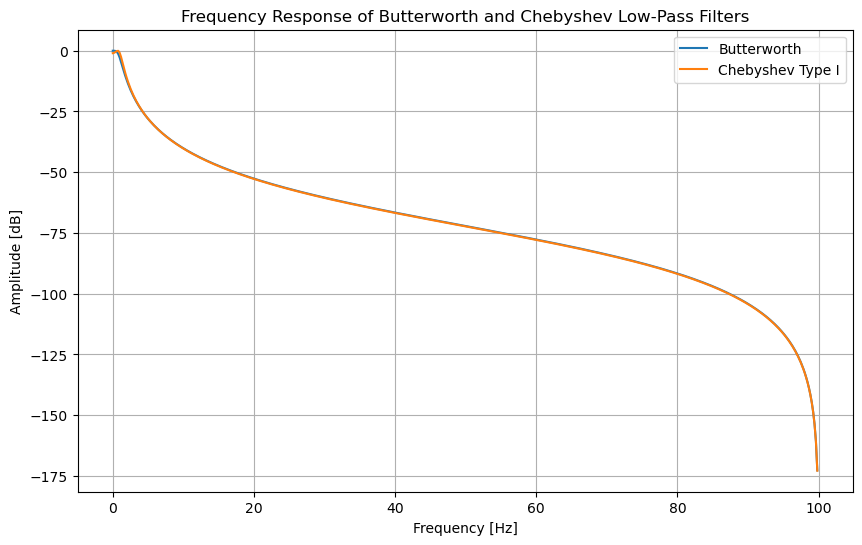

In [258]:
d

In [12]:
print(trace.data.max()/1000)

1.432
